In [296]:
## Imports for Functions

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import datetime

In [297]:
## Customer Profiles Table
def generate_customer_profiles_table(n_customers, random_state = 0):
    
    np.random.seed(random_state)
        
    customer_id_properties=[]
    
    # Generate customer properties from random distributions 
    for customer_id in range(n_customers):
        
        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)
        
        mean_amount = np.random.uniform(5,100) # Arbitrary (but sensible) value 
        std_amount = mean_amount/2 # Arbitrary (but sensible) value
        
        mean_nb_tx_per_day = np.random.uniform(0,4) # Arbitrary (but sensible) value 
        
        customer_id_properties.append([customer_id,
                                      x_customer_id, 
                                      y_customer_id,
                                      mean_amount, 
                                      std_amount,
                                      mean_nb_tx_per_day])
        
    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['customer_id',
                                                                      'x_customer_id', 
                                                                      'y_customer_id',
                                                                      'mean_amount', 
                                                                      'std_amount',
                                                                      'mean_nb_tx_per_day'])
    
    return customer_profiles_table

In [298]:
n_customers = 5
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table


,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,62.262521,31.131260,2.179533
1,1,42.365480,64.589411,46.570785,23.285393,3.567092
2,2,96.366276,38.344152,80.213879,40.106939,2.115580
3,3,56.804456,92.559664,11.748426,5.874213,0.348517
4,4,2.021840,83.261985,78.924891,39.462446,3.480049


In [299]:
## Terminal Profiles Table

def generate_terminal_profiles_table(n_terminals, random_state=0):
    
    np.random.seed(random_state)
        
    terminal_id_properties=[]
    
    # Generate terminal properties from random distributions 
    for terminal_id in range(n_terminals):
        
        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)
        
        terminal_id_properties.append([terminal_id,
                                      x_terminal_id, y_terminal_id])
                                       
    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns=['terminal_id',
                                                                      'x_terminal_id', 
                                                                      'y_terminal_id'])
    
    return terminal_profiles_table

In [300]:
n_terminals = 5
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [301]:
## List of Terminals within Radius

def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):
    
    # Use numpy arrays in the following to speed up computations
    
    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)
    
    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)
    
    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))
    
    # Get the indices of terminals which are at a distance less than r
    available_terminals = list(np.where(dist_x_y<r)[0])
    
    # Return the list of terminal IDs
    return available_terminals
    

In [302]:
# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)

# And get the list of terminals within radius of $50$ for the last customer
get_list_terminals_within_radius(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50)

[2, 3]

In [303]:
## List of Terminals outside of Radius

def get_list_suspicious_terminals(customer_profile, sus_x_y_terminals, r):
    
    # Use numpy arrays in the following to speed up computations
    
    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)
    
    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)
    
    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))

    # Get the indices of terminals which are at a distance greater than r
    sus_terminals = list(np.where(dist_x_y>r)[0])
    
    # Return the list of terminal IDs
    return sus_terminals

In [304]:
# We then get the geographical locations of all terminals as a numpy array
sus_x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)

# And get the list of terminals outside a radius of 50 for the last customer
get_list_suspicious_terminals(customer_profiles_table.iloc[4], sus_x_y_terminals=sus_x_y_terminals, r=50)

[0, 1, 4]

In [305]:
terminal_profiles_table

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [306]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.x_terminal_id.values, 
           terminal_profiles_table.y_terminal_id.values, 
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id, 
           customer_profiles_table.iloc[customer_id].y_customer_id, 
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                   customer_profiles_table.iloc[customer_id].y_customer_id), 
                   radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
    
ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)

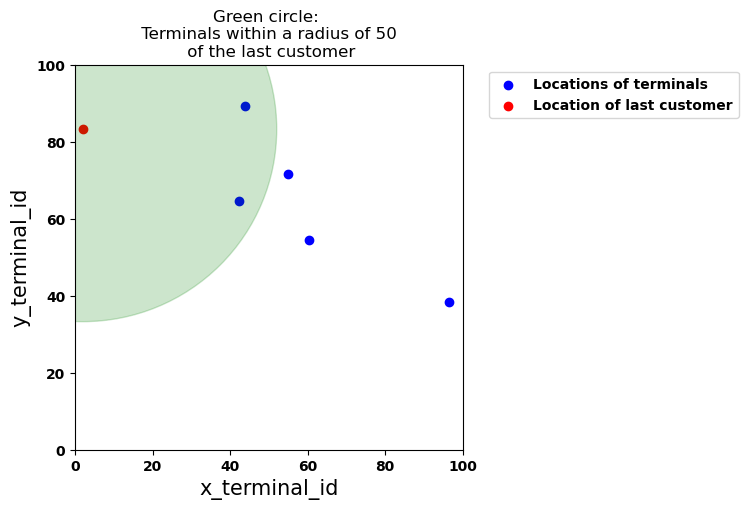

In [307]:
terminals_available_to_customer_fig

In [308]:
## Create New Column in Customer Profiles Table for Available Terminals

customer_profiles_table['available_terminals']=customer_profiles_table\
    .apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals = x_y_terminals, 
r=50), axis=1)
customer_profiles_table

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[1, 4]"
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[2, 3]"


In [309]:
## Create New Column in Customer Profiles Table for Suspicious Terminals

customer_profiles_table['suspicious_terminals']=customer_profiles_table\
    .apply(lambda x : get_list_suspicious_terminals(x, sus_x_y_terminals = sus_x_y_terminals, 
r=50), axis=1)
customer_profiles_table

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,suspicious_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[0, 1, 2, 3]",[4]
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[0, 1, 2, 3]",[4]
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[1, 4]","[0, 2, 3]"
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[0, 1, 2, 3]",[4]
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[2, 3]","[0, 1, 4]"


In [310]:
## Transactions Table

def generate_transactions_table(customer_profile, start_date = "2023-12-01", nb_days = 10):
    
    customer_transactions = []
    
    random.seed(int(customer_profile.customer_id))
    np.random.seed(int(customer_profile.customer_id))
    
    # For all days
    for day in range(nb_days):
        
        # Random number of transactions for that day 
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)
        
        # If nb_tx positive, let us generate transactions
        if nb_tx>0:
            
            for tx in range(nb_tx):
                
                # Time of transaction: Around noon, std 20000 seconds. This choice aims at 
                # simulating the fact that most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))
                
                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):
                    
                    # Amount is drawn from a normal distribution  
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)
                    
                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)
                    
                    amount=np.round(amount,decimals=2)
                    amount = '{:.2f}'.format(amount)
                    
                    if len(customer_profile.available_terminals)>0:
                        
                        terminal_id = random.choice(customer_profile.available_terminals)
                    
                        customer_transactions.append([time_tx + day * 86400, day,
                                                      customer_profile.customer_id, 
                                                      terminal_id, amount])
            
    customer_transactions = pd.DataFrame(customer_transactions, columns=['tx_time_seconds',
                                                                          'tx_time_days', 
                                                                          'customer_id', 
                                                                          'terminal_id', 
                                                                          'tx_amount'])
    
    if len(customer_transactions)>0:
        customer_transactions['tx_datetime'] = pd.to_datetime(customer_transactions["tx_time_seconds"], 
                                                              unit='s', origin=start_date)
        customer_transactions=customer_transactions[['tx_datetime',
                                                     'customer_id', 
                                                     'terminal_id', 
                                                     'tx_amount',
                                                     'tx_time_seconds', 
                                                     'tx_time_days']]
    
    return customer_transactions  
    
    

In [311]:
transaction_table_customer_0=generate_transactions_table(customer_profiles_table.iloc[0], 
                                                         start_date = "2023-12-01", 
                                                         nb_days = 5)
transaction_table_customer_0=transaction_table_customer_0.style.set_caption('Customer Transactions')
transaction_table_customer_0

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 07:19:05,0,3,123.59,26345,0
1,2023-12-01 19:02:02,0,3,46.51,68522,0
2,2023-12-01 18:00:16,0,0,77.34,64816,0
3,2023-12-02 15:13:02,0,2,32.35,141182,1
4,2023-12-02 14:05:38,0,3,63.30,137138,1
5,2023-12-02 15:46:51,0,3,13.59,143211,1
6,2023-12-02 08:51:06,0,2,54.72,118266,1
7,2023-12-02 20:24:47,0,3,51.89,159887,1
8,2023-12-03 12:15:47,0,2,117.91,216947,2
9,2023-12-03 08:50:09,0,1,67.72,204609,2


In [312]:
## Suspicious Transactions Table

def generate_suspicious_transactions_table(customer_profile, start_date = "2023-12-01", nb_days = 10):
    
    fraudster_transactions = []
    
    random.seed(int(customer_profile.customer_id))
    np.random.seed(int(customer_profile.customer_id))
    
    # For all days
    for day in range(nb_days):
        
        # Random number of transactions for that day 
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)
        
        # If nb_tx positive, let us generate transactions
        if nb_tx>0:
            
            for tx in range(nb_tx):
                
                # Time of transaction: Around noon, std 20000 seconds. This choice aims at 
                # simulating the fact that most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))
                
                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):
                    
                    # Amount is drawn from a random distribution  
                    sus_amount = round(np.random.uniform(0.00,3999.99), 2)
                    
                    # If amount negative, draw from a uniform distribution
                    if sus_amount<0:
                        sus_amount = np.random.uniform(0,customer_profile.mean_amount*2)
                    
                    sus_amount = np.round(sus_amount, decimals=2)
                    sus_amount = '{:.2f}'.format(sus_amount)
                    
                    if len(customer_profile.suspicious_terminals)>0:
                        
                        sus_terminal_id = random.choice(customer_profile.suspicious_terminals)
                    
                        fraudster_transactions.append([time_tx + day * 86400, day,
                                                      customer_profile.customer_id, 
                                                      sus_terminal_id, sus_amount])
            
    fraudster_transactions = pd.DataFrame(fraudster_transactions, columns=['tx_time_seconds',
                                                                          'tx_time_days', 
                                                                          'customer_id', 
                                                                          'sus_terminal_id', 
                                                                          'tx_amount'])
    
    if len(fraudster_transactions)>0:
        fraudster_transactions['tx_datetime'] = pd.to_datetime(fraudster_transactions["tx_time_seconds"], 
                                                              unit='s', origin=start_date)
        fraudster_transactions=fraudster_transactions[['tx_datetime',
                                                     'customer_id', 
                                                     'sus_terminal_id', 
                                                     'tx_amount',
                                                     'tx_time_seconds', 
                                                     'tx_time_days']]
    
    return fraudster_transactions  
    
    

In [313]:
suspicious_transaction_table_customer_0=generate_suspicious_transactions_table(customer_profiles_table.iloc[0], 
                                                         start_date = "2023-12-01", 
                                                         nb_days = 5)
suspicious_transaction_table_customer_0=suspicious_transaction_table_customer_0.style.set_caption('Fraudster Transactions')
suspicious_transaction_table_customer_0

,tx_datetime,customer_id,sus_terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 07:19:05,0,4,3567.08,26345,0
1,2023-12-01 22:56:38,0,4,3854.64,82598,0
2,2023-12-01 19:02:02,0,4,2115.57,68522,0
3,2023-12-01 09:11:22,0,4,2272.17,33082,0
4,2023-12-02 14:41:26,0,4,3480.04,139286,1
5,2023-12-03 15:13:02,0,4,2559.68,227582,2
6,2023-12-03 15:37:52,0,4,1058.22,229072,2
7,2023-12-03 10:39:17,0,4,2273.73,211157,2
8,2023-12-05 20:24:47,0,4,1748.12,419087,4
9,2023-12-05 10:04:01,0,4,2667.06,381841,4


In [314]:
# Transaction Table for All Customers
transactions_df=customer_profiles_table.groupby('customer_id')\
    .apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5))\
        .reset_index(drop=True)

transactions_df=transactions_df.style.set_caption('All Customers Transactions')
transactions_df

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 07:19:05,0,3,123.59,26345,0
1,2023-12-01 19:02:02,0,3,46.51,68522,0
2,2023-12-01 18:00:16,0,0,77.34,64816,0
3,2023-12-02 15:13:02,0,2,32.35,141182,1
4,2023-12-02 14:05:38,0,3,63.30,137138,1
5,2023-12-02 15:46:51,0,3,13.59,143211,1
6,2023-12-02 08:51:06,0,2,54.72,118266,1
7,2023-12-02 20:24:47,0,3,51.89,159887,1
8,2023-12-03 12:15:47,0,2,117.91,216947,2
9,2023-12-03 08:50:09,0,1,67.72,204609,2


In [315]:
# Transaction Table for All Fraudsters
fraudsters_transactions_df=customer_profiles_table.groupby('customer_id')\
    .apply(lambda x : generate_suspicious_transactions_table(x.iloc[0], nb_days=5))\
        .reset_index(drop=True)

fraudsters_transactions_df=fraudsters_transactions_df.style.set_caption('All Fraudsters Transactions')
fraudsters_transactions_df

,tx_datetime,customer_id,sus_terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 07:19:05,0,4,3567.08,26345,0
1,2023-12-01 22:56:38,0,4,3854.64,82598,0
2,2023-12-01 19:02:02,0,4,2115.57,68522,0
3,2023-12-01 09:11:22,0,4,2272.17,33082,0
4,2023-12-02 14:41:26,0,4,3480.04,139286,1
5,2023-12-03 15:13:02,0,4,2559.68,227582,2
6,2023-12-03 15:37:52,0,4,1058.22,229072,2
7,2023-12-03 10:39:17,0,4,2273.73,211157,2
8,2023-12-05 20:24:47,0,4,1748.12,419087,4
9,2023-12-05 10:04:01,0,4,2667.06,381841,4


In [316]:
# Larger Dataset Including Suspicious Terminals & Transactions

def generate_dataset(n_customers = 10000, 
                     n_terminals = 1000000, 
                     nb_days = 90, 
                     start_date = "2023-12-01", 
                     r = 5):
    
    start_time = time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers, 
                                                               random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s"\
          .format(time.time()-start_time))
    
    start_time = time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals, 
                                                               random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s"\
          .format(time.time()-start_time))
    
    # With Pandarallel
    # customer_profiles_table['available_terminals'] = customer_profiles_table\
    # .parallel_apply(lmabda x : get_list_closest_terminals(x, x_y_terminals = x_y_terminals, 
    # r = r, axis = 1))

    start_time = time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id', 'y_terminal_id']].values.astype(float)
    customer_profiles_table['available_terminals'] = customer_profiles_table\
        .apply(lambda x : get_list_terminals_within_radius(x, 
                                                           x_y_terminals = x_y_terminals, 
                                                           r = r), axis = 1)
    customer_profiles_table['nb_terminals'] = customer_profiles_table.available_terminals.apply(len)
    print("Time to associate available terminals to customers: {0:.2}s".format(time.time()-start_time))

    start_time = time.time()
    sus_x_y_terminals = terminal_profiles_table[['x_terminal_id', 'y_terminal_id']].values.astype(float)
    customer_profiles_table['suspicious_terminals'] = customer_profiles_table\
        .apply(lambda x : get_list_suspicious_terminals(x, sus_x_y_terminals = sus_x_y_terminals, 
                                                           r = r), axis = 1)
    customer_profiles_table['nb_sus_terminals'] = customer_profiles_table.suspicious_terminals.apply(len)
    print("Time to associate suspicious terminals to customers: {0:.2}s".format(time.time()-start_time))

    # With Pandarallel
    # transactions_df = customer_profiles_table.groupby('customer_id')\
    #   .parallel_apply(lambda x : generate_transactions_table(x.iloc[0], nb_days = nb_days))\
    #       .reset_index(drop = True)
    start_time = time.time()
    transactions_df = customer_profiles_table.groupby('customer_id')\
        .apply(lambda x : generate_transactions_table(x.iloc[0], nb_days = nb_days))\
            .reset_index(drop = True)
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))

    start_time = time.time()
    suspicious_transactions_df = customer_profiles_table.groupby('customer_id')\
        .apply(lambda x : generate_suspicious_transactions_table(x.iloc[0], nb_days = nb_days))\
            .reset_index(drop = True)
    print("Time to generate Suspicious transactions: {0:.2}s".format(time.time()-start_time))

    # Sort transactions chronologially
    transactions_df = transactions_df.sort_values('tx_datetime')
    # Reset indices, starting from 0
    transactions_df.reset_index(inplace = True, drop = True)
    transactions_df.reset_index(inplace = True)
    # transaction_id are the dataframe indices, starting from 0
    transactions_df.rename(columns = {'index' : 'transaction_id'}, inplace = True)


    # Sort transactions chronologially
    suspicious_transactions_df = suspicious_transactions_df.sort_values('tx_datetime')
    # Reset indices, starting from 0
    suspicious_transactions_df.reset_index(inplace = True, drop = True)
    suspicious_transactions_df.reset_index(inplace = True)
    # transaction_id are the dataframe indices, starting from 0
    suspicious_transactions_df.rename(columns = {'index' : 'transaction_id'}, inplace = True)

    return (customer_profiles_table, terminal_profiles_table, transactions_df, suspicious_transactions_df)


    

In [347]:
# Dataset with 5000 Customers, 10,000 Terminals, 90 Days of Transactions
# Corresponding dates from 2023/12/01 - 2024/02/28
(customer_profiles_table, terminal_profiles_table, transactions_df, suspicious_transactions_df) = \
    generate_dataset(n_customers = 3000, 
                     n_terminals = 6000, 
                     nb_days = 90, 
                     start_date = "2023-12-01",
                     r = 5)

Time to generate customer profiles table: 0.026s
Time to generate terminal profiles table: 0.024s
Time to associate available terminals to customers: 1.7s
Time to associate suspicious terminals to customers: 1.6s
Time to generate transactions: 5.8e+01s
Time to generate Suspicious transactions: 4.7e+01s


In [348]:
transactions_df.shape

(517848, 7)

In [349]:
suspicious_transactions_df.shape

(517301, 7)

In [350]:
transactions_df

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,0,2023-12-01 00:00:31,596,1337,57.16,31,0
1,1,2023-12-01 00:07:56,2,523,146.00,476,0
2,2,2023-12-01 00:10:34,927,5539,50.99,634,0
3,3,2023-12-01 00:10:45,568,4805,44.71,645,0
4,4,2023-12-01 00:11:30,2803,2746,96.03,690,0
...,...,...,...,...,...,...,...
517843,517843,2024-02-28 23:53:47,281,4024,95.81,7775627,89
517844,517844,2024-02-28 23:54:29,2564,5952,27.85,7775669,89
517845,517845,2024-02-28 23:54:44,1476,5551,41.54,7775684,89
517846,517846,2024-02-28 23:55:39,2695,5451,126.85,7775739,89


In [351]:
suspicious_transactions_df

,transaction_id,tx_datetime,customer_id,sus_terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,0,2023-12-01 00:00:31,596,1,2387.80,31,0
1,1,2023-12-01 00:02:40,1145,4,3989.32,160,0
2,2,2023-12-01 00:06:07,2877,1,2426.49,367,0
3,3,2023-12-01 00:07:51,1516,0,2046.92,471,0
4,4,2023-12-01 00:07:56,2,0,1681.47,476,0
...,...,...,...,...,...,...,...
517296,517296,2024-02-28 23:52:00,134,1,2405.58,7775520,89
517297,517297,2024-02-28 23:53:17,1632,4,575.32,7775597,89
517298,517298,2024-02-28 23:54:14,625,3,1857.44,7775654,89
517299,517299,2024-02-28 23:56:51,164,4,2361.86,7775811,89


In [352]:
# Concatenate Customer Transactions & Suspicious Terminal Transactions
# Tehn Sort by Transaction Date & Time

transactions_df = pd.concat([transactions_df, suspicious_transactions_df], axis=0).sort_values('tx_datetime')
transactions_df


,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,sus_terminal_id
0,0,2023-12-01 00:00:31,596,1337,57.16,31,0,NaN
0,0,2023-12-01 00:00:31,596,NaN,2387.80,31,0,1
1,1,2023-12-01 00:02:40,1145,NaN,3989.32,160,0,4
2,2,2023-12-01 00:06:07,2877,NaN,2426.49,367,0,1
3,3,2023-12-01 00:07:51,1516,NaN,2046.92,471,0,0
...,...,...,...,...,...,...,...,...
517845,517845,2024-02-28 23:54:44,1476,5551,41.54,7775684,89,NaN
517846,517846,2024-02-28 23:55:39,2695,5451,126.85,7775739,89,NaN
517299,517299,2024-02-28 23:56:51,164,NaN,2361.86,7775811,89,4
517847,517847,2024-02-28 23:59:01,2044,5529,27.88,7775941,89,NaN


In [323]:
# Not needed after Concat Transactions
#    sus_distribution_amount_times_fig, ax=plt.subplots(1, 2, figsize=(18,4))
#
#    sus_amount_val = suspicious_transactions_df[suspicious_transactions_df.tx_time_days<10]['tx_amount'].sample(n=10000).values
#    sus_time_val = suspicious_transactions_df[suspicious_transactions_df.tx_time_days<10]['tx_time_seconds'].sample(n=10000).values

#    plt.grid(axis='y')

#    sns.histplot(sus_amount_val, ax=ax[0], color='red', kde=False)
#    ax[0].set_title('Distribution of Suspicious Transaction Amounts', fontsize=14, weight='semibold')
#    ax[0].set_xlim([min(sus_amount_val), max(sus_amount_val)])
#    ax[0].set(xlabel='Amount', ylabel='Number of Transactions')


    # Divide the time variables by 86400 to transform seconds into days in the plot
#    sns.histplot(sus_time_val/86400, ax=ax[1], color='blue', bins=100, kde=False)
#    ax[1].set_title('Distribution of Suspicious Transaction Times', fontsize=14, weight='semibold')
#    ax[1].set_xlim([min(sus_time_val/86400), max(sus_time_val/86400)])
#    ax[1].set_xticks(range(10))
#    ax[1].set(xlabel='Time (days)', ylabel="Number of Transactions")


Text(0, 0.5, 'Number of Transactions')

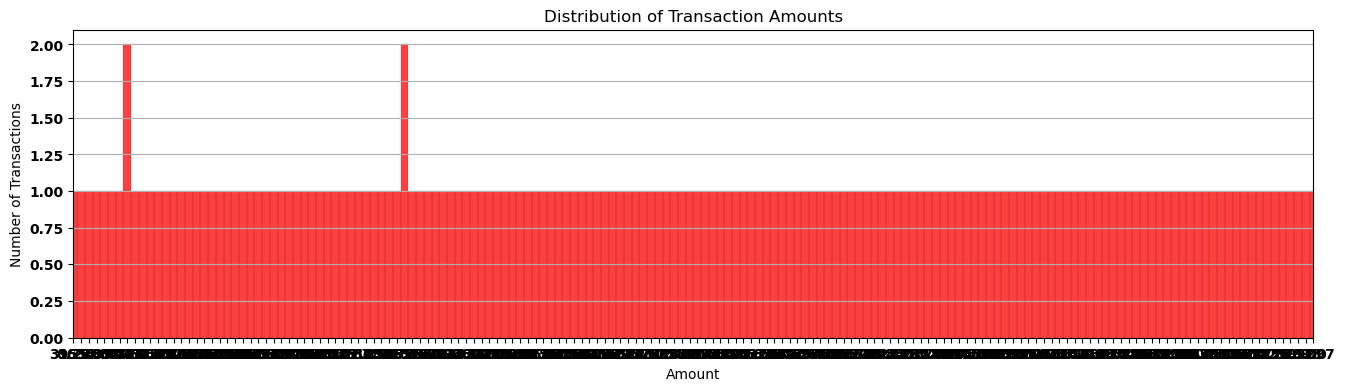

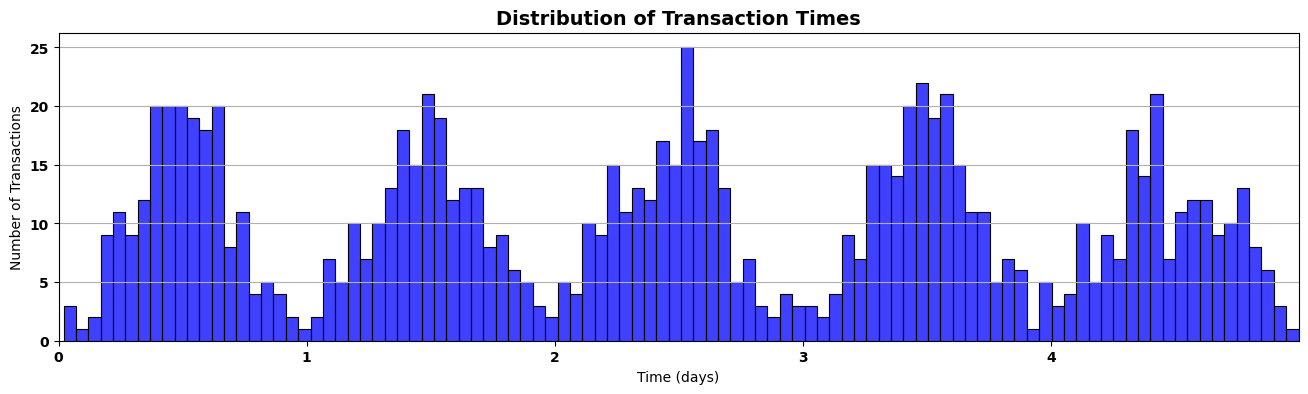

In [353]:
# Plotting Distribution of Transaction Amounts and Times

distribution_amount_fig, ax=plt.subplots(1, figsize=(16,4))

amount_val = transactions_df[transactions_df.tx_time_days<5]['tx_amount'].sample(n=1000).values

plt.grid(axis='y')

sns.histplot(data=amount_val, ax=ax, bins=100, color='red', kde=False)
plt.title('Distribution of Transaction Amounts')
plt.xlim([min(amount_val),max(amount_val)])
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')

distribution_times_fig, ax=plt.subplots(1, figsize=(16,4))

time_val = transactions_df[transactions_df.tx_time_days<5]['tx_time_seconds'].sample(n=1000).values

plt.grid(axis='y')
# Divide the time variables by 86400 to transform seconds into days in the plot
sns.histplot(data=time_val/86400, ax=ax, color='blue', bins=100, kde=False)
plt.title('Distribution of Transaction Times', fontsize=14, weight='semibold')
plt.xlim([min(time_val/86400), max(time_val/86400)])
plt.xticks(range(5))
plt.xlabel('Time (days)')
plt.ylabel('Number of Transactions')

In [356]:
# Add Fraud Scenarios

def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):
    
    # By default, all transactions are genuine
    transactions_df['TX_FRAUD']=0
    transactions_df['TX_FRAUD_SCENARIO']=0
    
    # Scenario 1
    # Registering possible fraud if the transaction amount is in a range
    transactions_df.loc[transactions_df.tx_amount==(300>400), 'TX_FRAUD']=+0.1
    transactions_df.loc[transactions_df.tx_amount==(300>400), 'TX_FRAUD_SCENARIO']=1

    transactions_df.loc[transactions_df.tx_amount==(400>500), 'TX_FRAUD']=+0.1
    transactions_df.loc[transactions_df.tx_amount==(400>500), 'TX_FRAUD_SCENARIO']=1

    transactions_df.loc[transactions_df.tx_amount==(500>600), 'TX_FRAUD']=+0.1
    transactions_df.loc[transactions_df.tx_amount==(500>600), 'TX_FRAUD_SCENARIO']=1

    transactions_df.loc[transactions_df.tx_amount==(600>700), 'TX_FRAUD']=+0.1
    transactions_df.loc[transactions_df.tx_amount==(600>700), 'TX_FRAUD_SCENARIO']=1

    transactions_df.loc[transactions_df.tx_amount==(700>800), 'TX_FRAUD']=+0.1
    transactions_df.loc[transactions_df.tx_amount==(700>800), 'TX_FRAUD_SCENARIO']=1

    transactions_df.loc[transactions_df.tx_amount==(800>900), 'TX_FRAUD']=+0.1
    transactions_df.loc[transactions_df.tx_amount==(800>900), 'TX_FRAUD_SCENARIO']=1

    transactions_df.loc[transactions_df.tx_amount==(900>1000), 'TX_FRAUD']=+0.2
    transactions_df.loc[transactions_df.tx_amount==(900>1000), 'TX_FRAUD_SCENARIO']=1

    transactions_df.loc[transactions_df.tx_amount==(1000>2000), 'TX_FRAUD']=+0.2
    transactions_df.loc[transactions_df.tx_amount==(1000>2000), 'TX_FRAUD_SCENARIO']=1

    transactions_df.loc[transactions_df.tx_amount==(2000>3000), 'TX_FRAUD']=+0.3
    transactions_df.loc[transactions_df.tx_amount==(2000>3000), 'TX_FRAUD_SCENARIO']=1

    transactions_df.loc[transactions_df.tx_amount==(3000>4000), 'TX_FRAUD']=+0.3
    transactions_df.loc[transactions_df.tx_amount==(3000>4000), 'TX_FRAUD_SCENARIO']=1

    nb_frauds_scenario_1=transactions_df.TX_FRAUD.sum()
    print("Number of Frauds from scenario 1: "+str(nb_frauds_scenario_1))
    
    # Scenario 2
    # Registering possible fraud if criminal use of random terminals via phishing methods
    for day in range(transactions_df.tx_time_days.max()):
        
        compromised_terminals = terminal_profiles_table.terminal_id.sample(n=2, random_state=day)
        
        compromised_transactions=transactions_df[(transactions_df.tx_time_days>=day) & 
                                                    (transactions_df.tx_time_days<day+28) & 
                                                    (transactions_df.terminal_id.isin(compromised_terminals))]
                            
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD']=+0.5
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO']=2
    
    nb_frauds_scenario_2=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_1
    print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))
    
    # Scenario 3
    # Registering possible fraud if random customer has unusual transaction amounts
    # This scenario shows 1/3 of transactions amounts multiplied by 5 over 14 days
    for day in range(transactions_df.tx_time_days.max()):
        
        compromised_customers = customer_profiles_table.customer_id.sample(n=3, random_state=day).values
        
        compromised_transactions=transactions_df[(transactions_df.tx_time_days>=day) & 
                                                    (transactions_df.tx_time_days<day+14) & 
                                                    (transactions_df.customer_id.isin(compromised_customers))]
        
        nb_compromised_transactions=len(compromised_transactions)
        
        
        random.seed(day)
        index_fauds = random.sample(list(compromised_transactions.index.values),k=int(nb_compromised_transactions/3))
        
        transactions_df.loc[index_fauds,'tx_amount']=transactions_df.loc[index_fauds,'tx_amount']*5
        transactions_df.loc[index_fauds,'TX_FRAUD']=+0.3
        transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO']=3

    nb_frauds_scenario_3=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1
    print("Number of frauds from scenario 3: "+str(nb_frauds_scenario_3))

    # Scenario 4
    # Registering Possible Suspicious Terminals
    # These Terminals would be outside a radius of 50 from customers location
    transactions_df.loc[(transactions_df['transaction_id'] is not np.nan)&(transactions_df['sus_terminal_id'] is not np.nan), 
                        transactions_df.TX_FRAUD]=+0.3
    transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO']=4                      

    nb_frauds_scenario_4=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_3-nb_frauds_scenario_2-nb_frauds_scenario_1
    print("Number of frauds from scenario 4: "+str(nb_frauds_scenario_4))
    
    return transactions_df                 

In [357]:
# Add Fraud Transactions using these scenarios
%time transactions_df = add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df)

Number of Frauds from scenario 1: 0.0
Number of frauds from scenario 2: 4100.0
Number of frauds from scenario 3: 2551.500000000001


MemoryError: Unable to allocate 7.80 TiB for an array with shape (1035149, 1035149) and data type float64

In [327]:
# Number of Fraud Transactions
transactions_df.TX_FRAUD.sum()

6675.6

In [328]:

transactions_df

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,sus_terminal_id,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-12-01 00:00:31,596,3156,57.16,31,0,NaN,0.0,0
0,0,2023-12-01 00:00:31,596,NaN,2387.80,31,0,1,0.0,0
1,1,2023-12-01 00:02:10,4961,3412,81.51,130,0,NaN,0.0,0
1,1,2023-12-01 00:02:40,1145,NaN,3989.32,160,0,4,0.0,0
2,2,2023-12-01 00:06:07,2877,NaN,2426.49,367,0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...
862133,862133,2024-02-28 23:56:51,164,NaN,2361.86,7775811,89,4,0.0,0
863004,863004,2024-02-28 23:57:39,4103,9712,5.07,7775859,89,NaN,0.0,0
863005,863005,2024-02-28 23:59:01,2044,4481,27.88,7775941,89,NaN,0.0,0
862134,862134,2024-02-28 23:59:05,4580,NaN,2818.28,7775945,89,2,0.0,0


In [329]:
transactions_df.query('TX_FRAUD > 0.5')

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,sus_terminal_id,TX_FRAUD,TX_FRAUD_SCENARIO


In [330]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==1].shape

(0, 10)

In [331]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==2].shape

(8181, 10)

In [332]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==3].shape

(8617, 10)

In [333]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==4].shape

(0, 10)

In [334]:
def get_stats(transactions_df):
    # Number of Transactions per Day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['customer_id'].count()
    # Number of Fraudulent Transactions per Day
    nb_fraud_per_day=transactions_df.groupby([''])
    # Number of Fraudulent Cards per Day
    nb_fraudcard_per_day=transactions_df[transactions_df['TX_FRAUD']>0]\
        .groupby(['tx_time_days']).customer_id.nunique()
    
    return (nb_tx_per_day, nb_fraud_per_day, nb_fraudcard_per_day)

(nb_tx_per_day, nb_fraud_per_day, nb_fraudcard_per_day)=get_stats(transactions_df)

n_days=len(nb_tx_per_day)
tx_stats=pd.DataFrame(['value':pd.concat([nb_tx_per_day/50, nb_fraud_per_day,
                                           nb_fraudcard_per_day])])
tx_stats=tx_stats.reset_index()

In [ ]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.5)

fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x='tx_time_days', y='value', data=tx_stats, hue='stat_type', 
                    hue_order=['nb_tx_per_day', 'nb_fraud_per_day', 'nb_fraudcard_per_day'], 
                    legend=False)

sns_plot.set_title('Total Transactions, and Number of Fraudulent Transactions \n \
    and number of compromised cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", 
            ylabel="Number")

sns_plot.set_ylim([0,300])

labels_legend = ['# Transactions per Day (/50)', 
                '# Fraudulent Transactions per Day', 
                '# Fraudulent Cards per Day']

sns_plot.legend(loc='upper left', labels=labels_legend, 
                bbox_to_anchor=(1.05, 1), fontsize=15)

In [ ]:
fraud_and_transactions_stats_fig

In [ ]:
dir_output = "./simulated-data-raw/"

if not os.path.exists(dir_output):
    os.makedirs(dir_output)

start_date = datetime.datetime.strptime("2023-12-01", "%Y-%M-%D")

for day in range(transactions_df.tx_time_days.max()+1):
    
    transactions_day = transactions_df[transactions_df.tx_time_days==day]\
        .sort_values('tx_time_seconds')
    
    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%M-%D")+'.pkl'
    
    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(dir_output+filename_output, protocol=4)